<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week03_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week03_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Indentitas
**Kelompok 6**:
 - Agus Prayogi (2141720025)
 - Diah Putri Nofianti (2141720054)

Kelas: TI - 3A

# Praktikum

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

### Transformasi Linier Brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


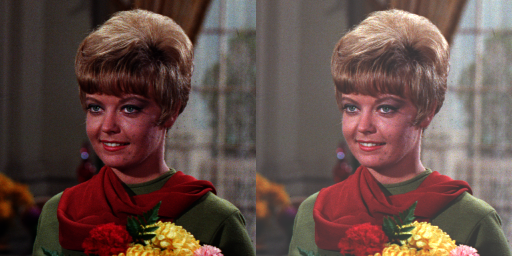

In [20]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

ori = cv.imread('/content/drive/Shareddrives/Yogi/TugasKul/SMT5/Pengolahan Citra dan Visi Komputer/Minggu 3/female.tiff')
brightness_img = np.zeros(ori.shape, ori.dtype)

# Akses per pixel
# for y in range(ori.shape[0]):
#   for x in range(ori.shape[1]):
#     for c in range(ori.shape[2]):
#       brightness_img[y,x,c] = np.clip(ori[y,x,c]+brightness,0,255) # formula g(x)=f(x)+b

# Cara simple tanpa loop
brightness_img = cv.convertScaleAbs(ori, beta=brightness)

final_frame = cv.hconcat((ori, brightness_img))
cv2_imshow(final_frame)

# Tugas

### Inverse Color

Mengubah warna menjadi negatif
------------------------------


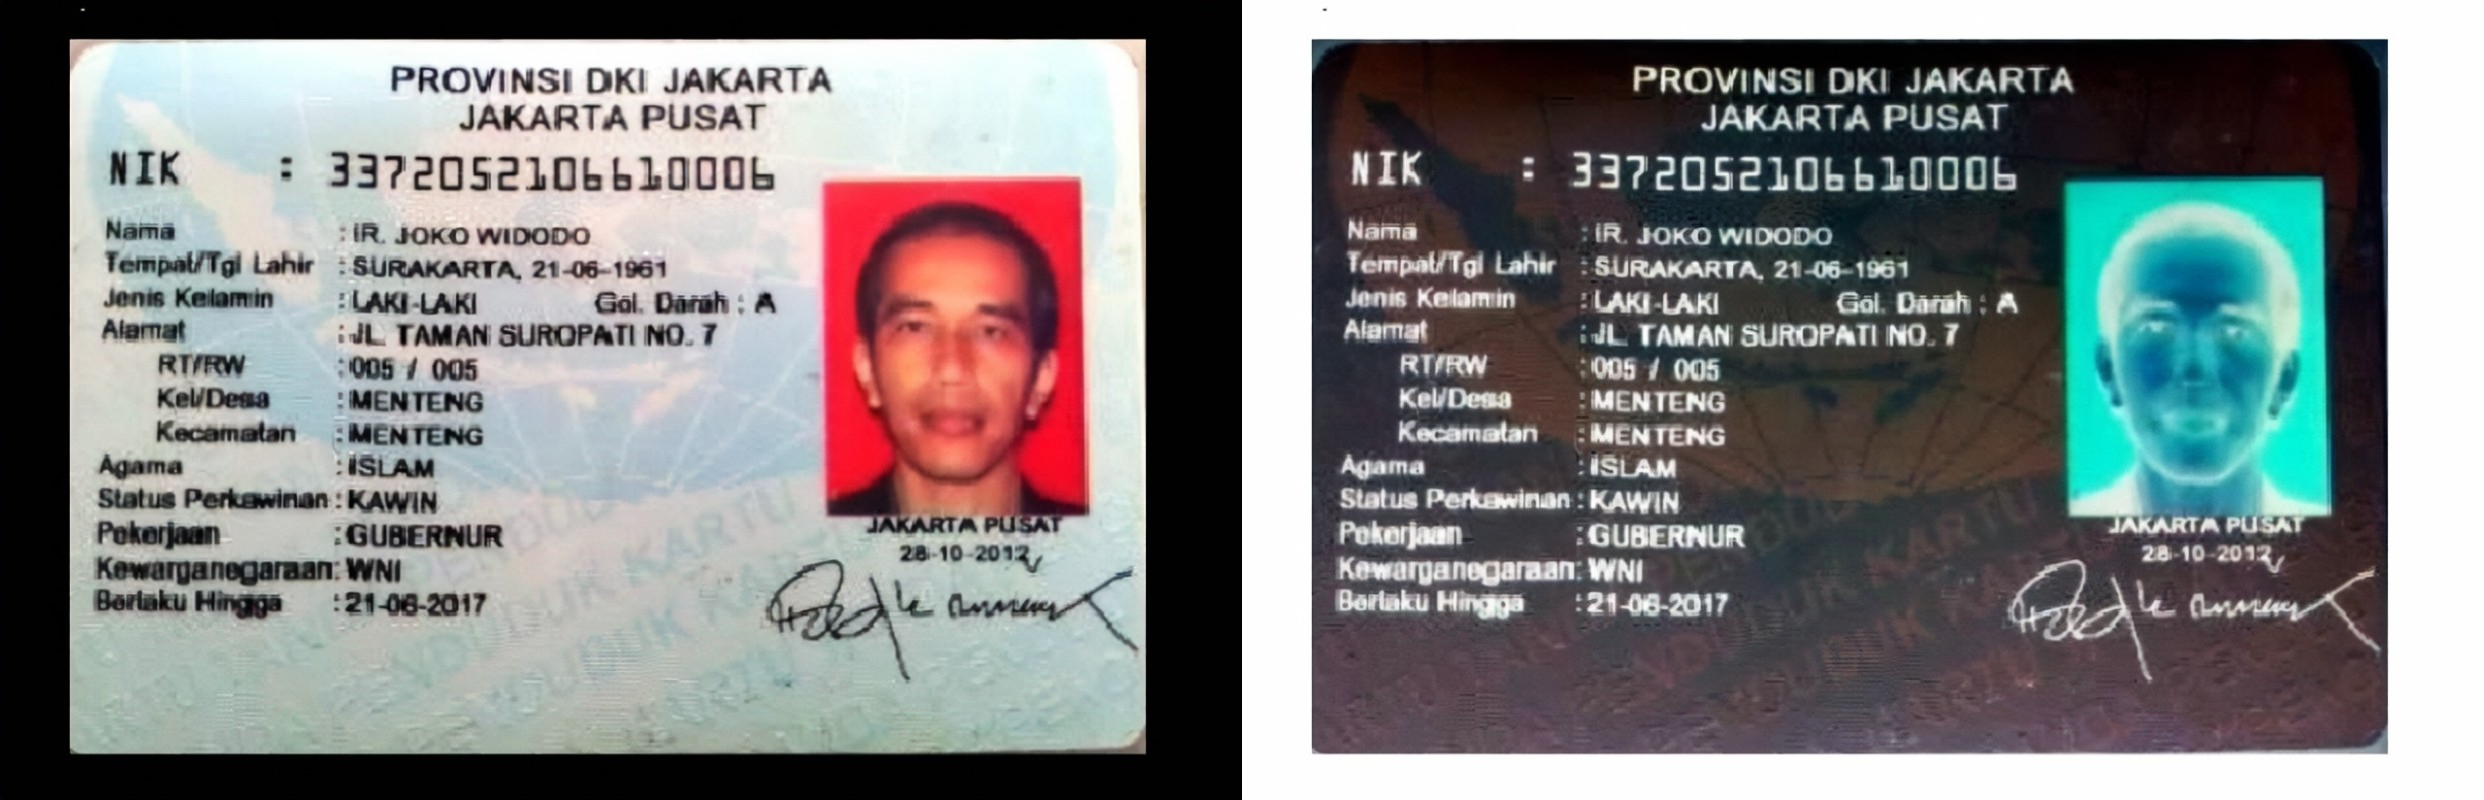

In [21]:
print('Mengubah warna menjadi negatif')
print('------------------------------')
ktp = cv.imread('/content/drive/Shareddrives/Yogi/TugasKul/SMT5/Pengolahan Citra dan Visi Komputer/KTP.jpeg') # membaca gambar
inverse = ktp.copy() # membuat salinan gambar asli untuk gambar manipulasi
for y in range(ktp.shape[0]): # iterasi baris gambar
  for x in range(ktp.shape[1]): # iterasi kolom gambar
    for c in range(ktp.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      inverse[y,x,c] = np.clip(255-ktp[y,x,c],0,255) # formula untuk membalikkan warna gambar yaitu g(x)=255-f(x)

final_frame = cv.hconcat((ktp, inverse)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

### Transformasi Constrast

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


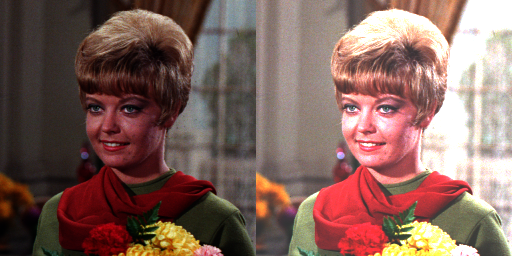

In [22]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try: # untuk menangani error
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: ')) # membuat inputan user
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError: # menjalankan kode ketika error
  print('Error, not a number') # menampilkan message, penanda error

constrast_img = ori.copy()  # membuat salinan gambar asli untuk gambar manipulasi

for y in range(ori.shape[0]): # iterasi baris gambar
  for x in range(ori.shape[1]): # iterasi kolom gambar
    for c in range(ori.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      constrast_img[y,x,c] = np.clip(contrast*ori[y,x,c]+brightness,0,255) # formula untuk memanipulasi kontras pada gambar yaitu g(x,y)=a*f(x,y)+b

final_frame = cv.hconcat((ori, constrast_img)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

### Transformasi Logarithmic Brightness

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


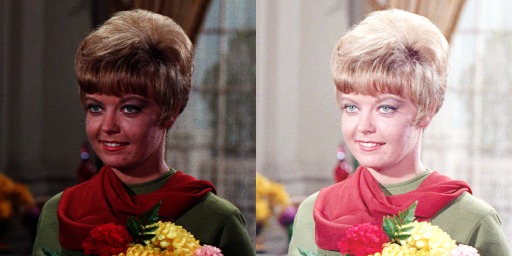

In [23]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')
try: # untuk menangani error
  brightness = int(input('Masukkan nilai kecerahan: ')) # membuat inputan user
except ValueError: # menjalankan kode ketika error
  print('Error, not a number') # menampilkan message, penanda error

brightness_img = ori.copy()  # membuat salinan gambar asli untuk gambar manipulasi

for y in range(ori.shape[0]): # iterasi baris gambar
  for x in range(ori.shape[1]): # iterasi kolom gambar
    for c in range(ori.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      r = ori[y,x,c] # nilai grey-level input gambar
      brightness_img[y,x,c] = np.clip(brightness*np.log(1+r),0,255) # formula untuk logarithmic brightness yaitu s=c*log(1+r)

final_frame = cv.hconcat((ori, brightness_img)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

### Averaging

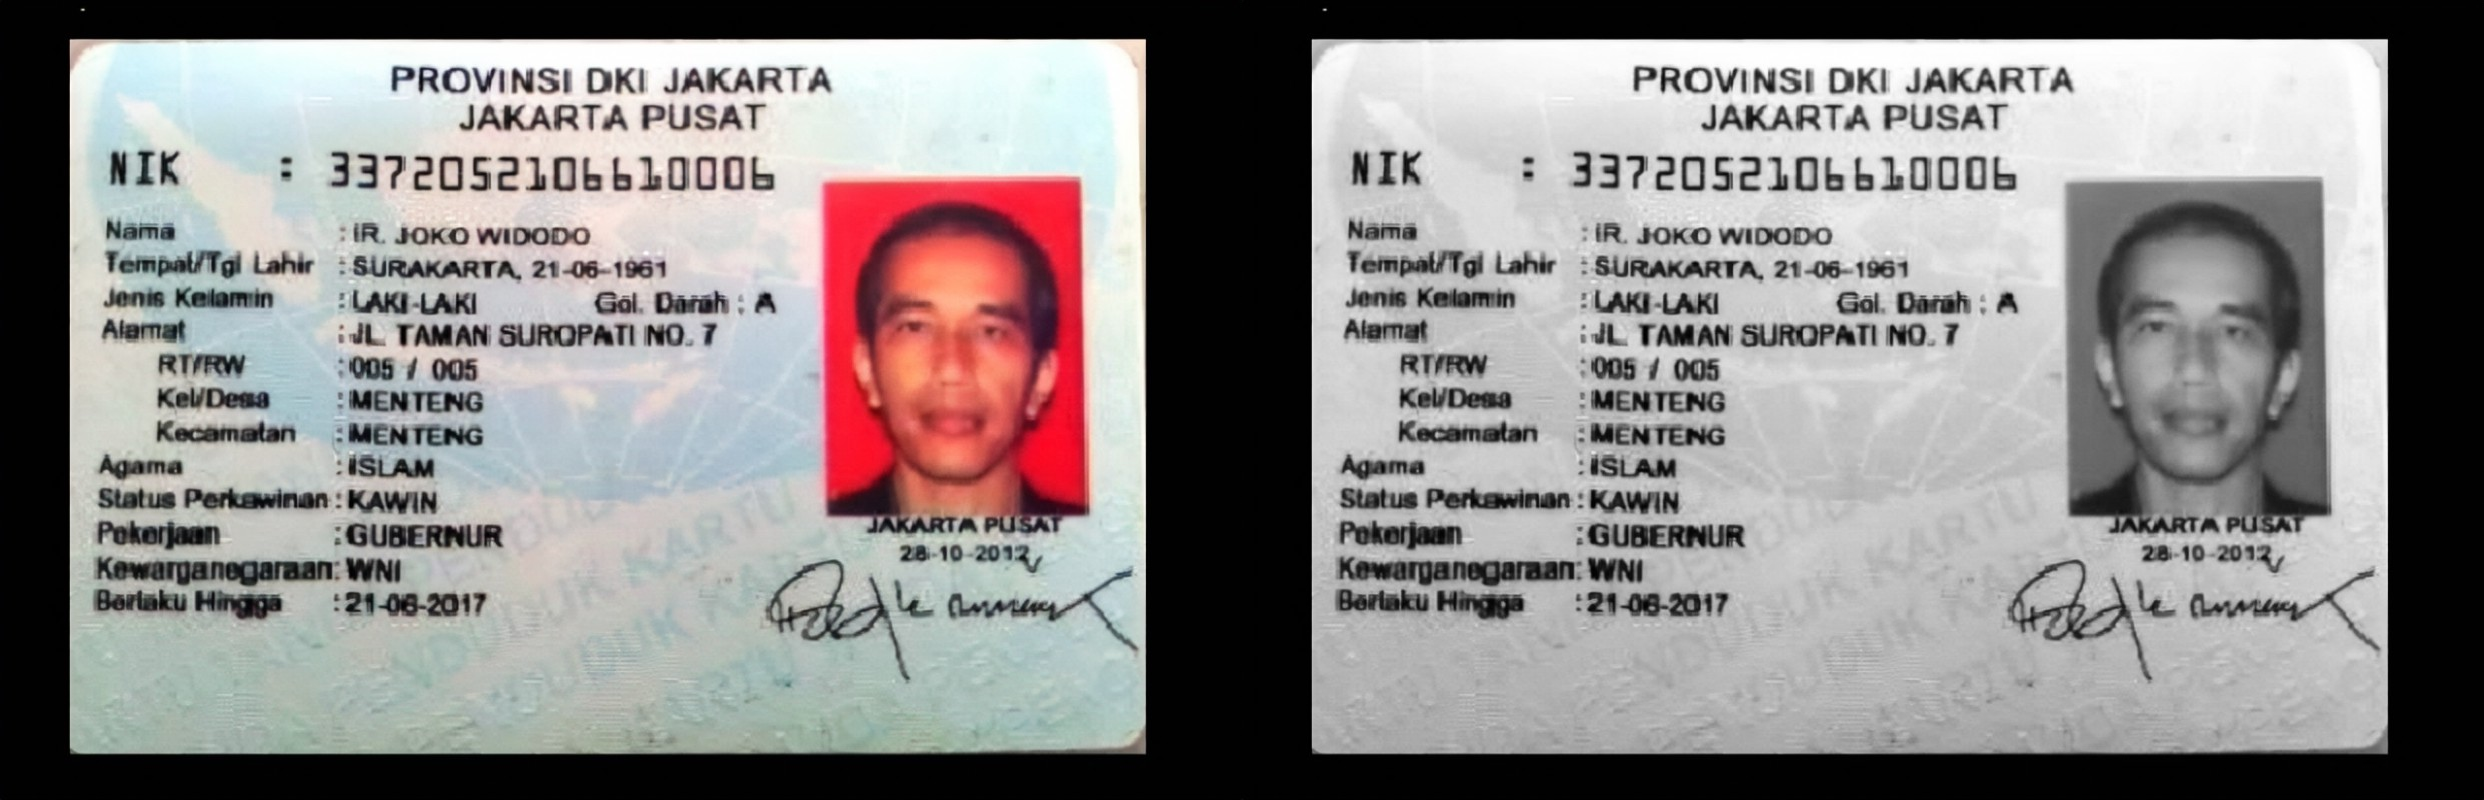

In [24]:
avg = ktp.copy()
for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
      avg[y,x] = np.mean(ktp[y,x]) # formula grayscale(avg)=(R+G+B)/3

final_frame = cv.hconcat((ktp, avg))
cv2_imshow(final_frame)

### Lightness

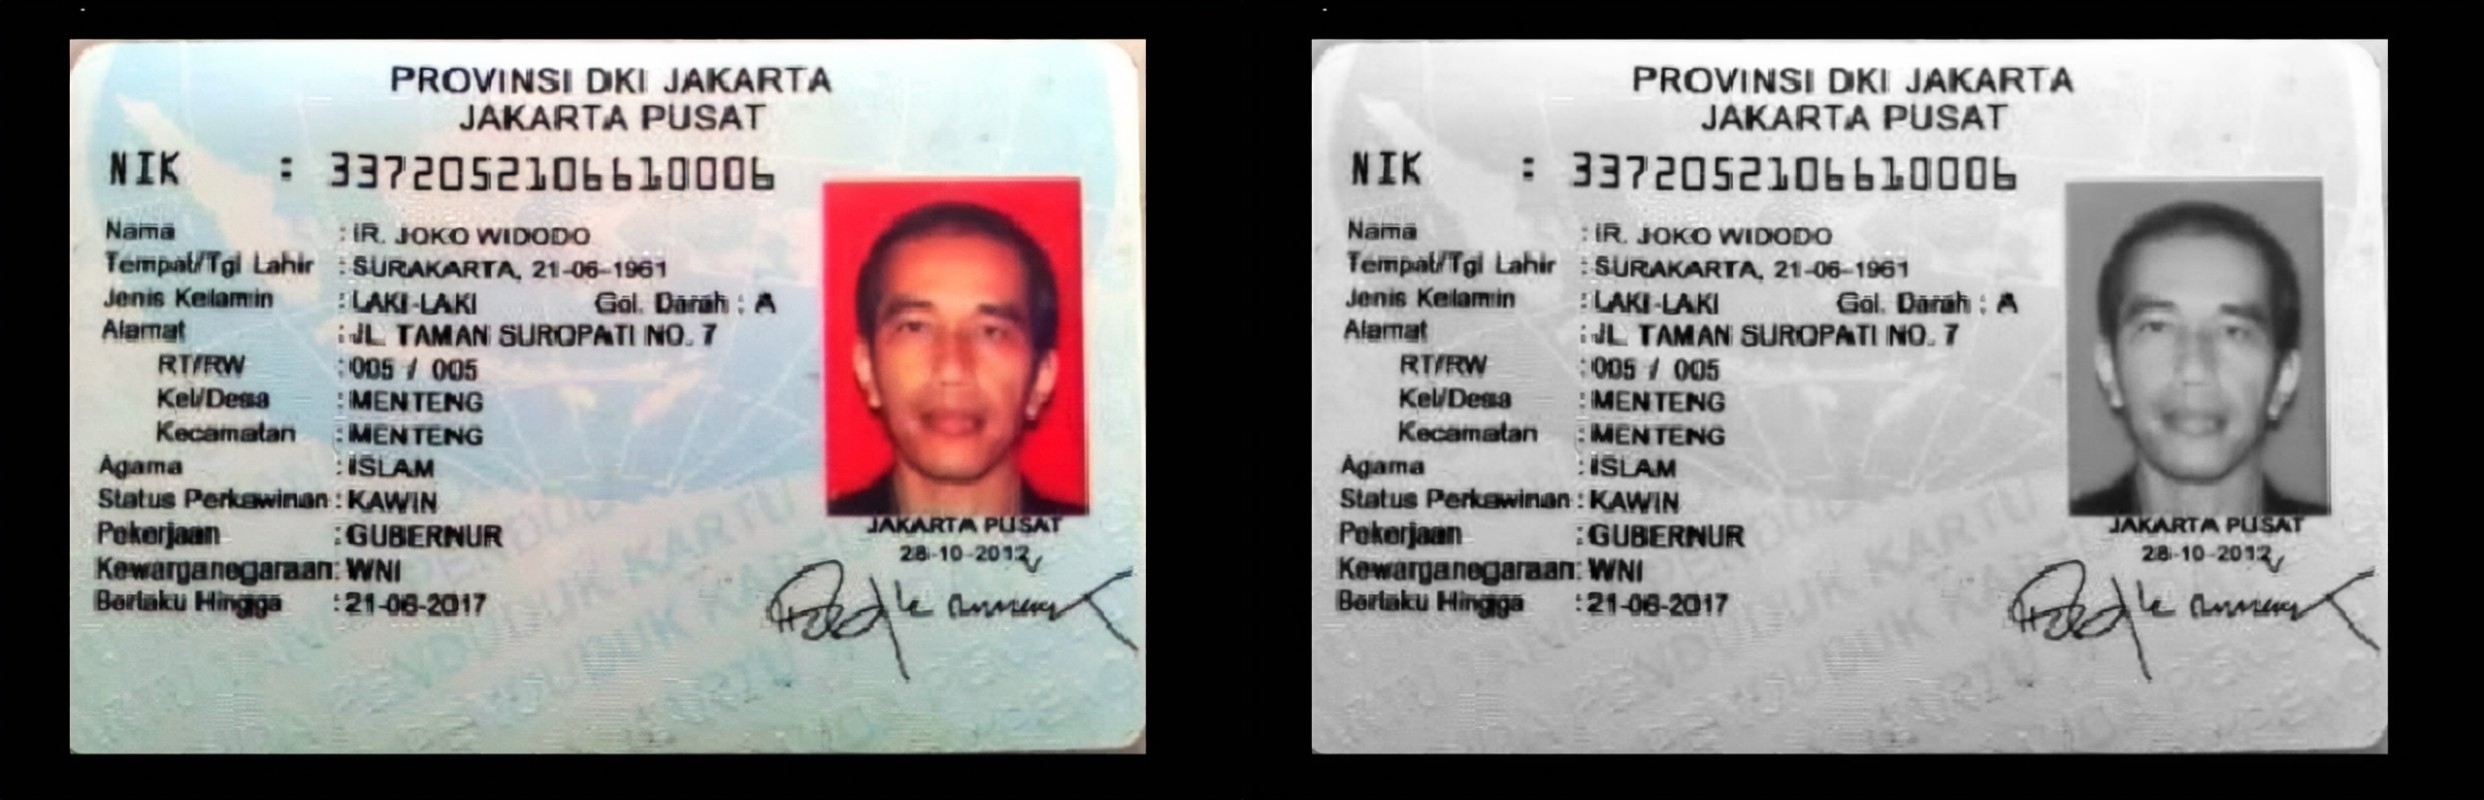

In [25]:
lightness = ktp.copy()
for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
      lightness[y,x] = np.mean([max(ktp[y,x]), min(ktp[y,x])]) # formula grayscale(lightness)=(max[R,G,B]+min[R,G,B])/2

final_frame = cv.hconcat((ktp, lightness))
cv2_imshow(final_frame)

### Luminance

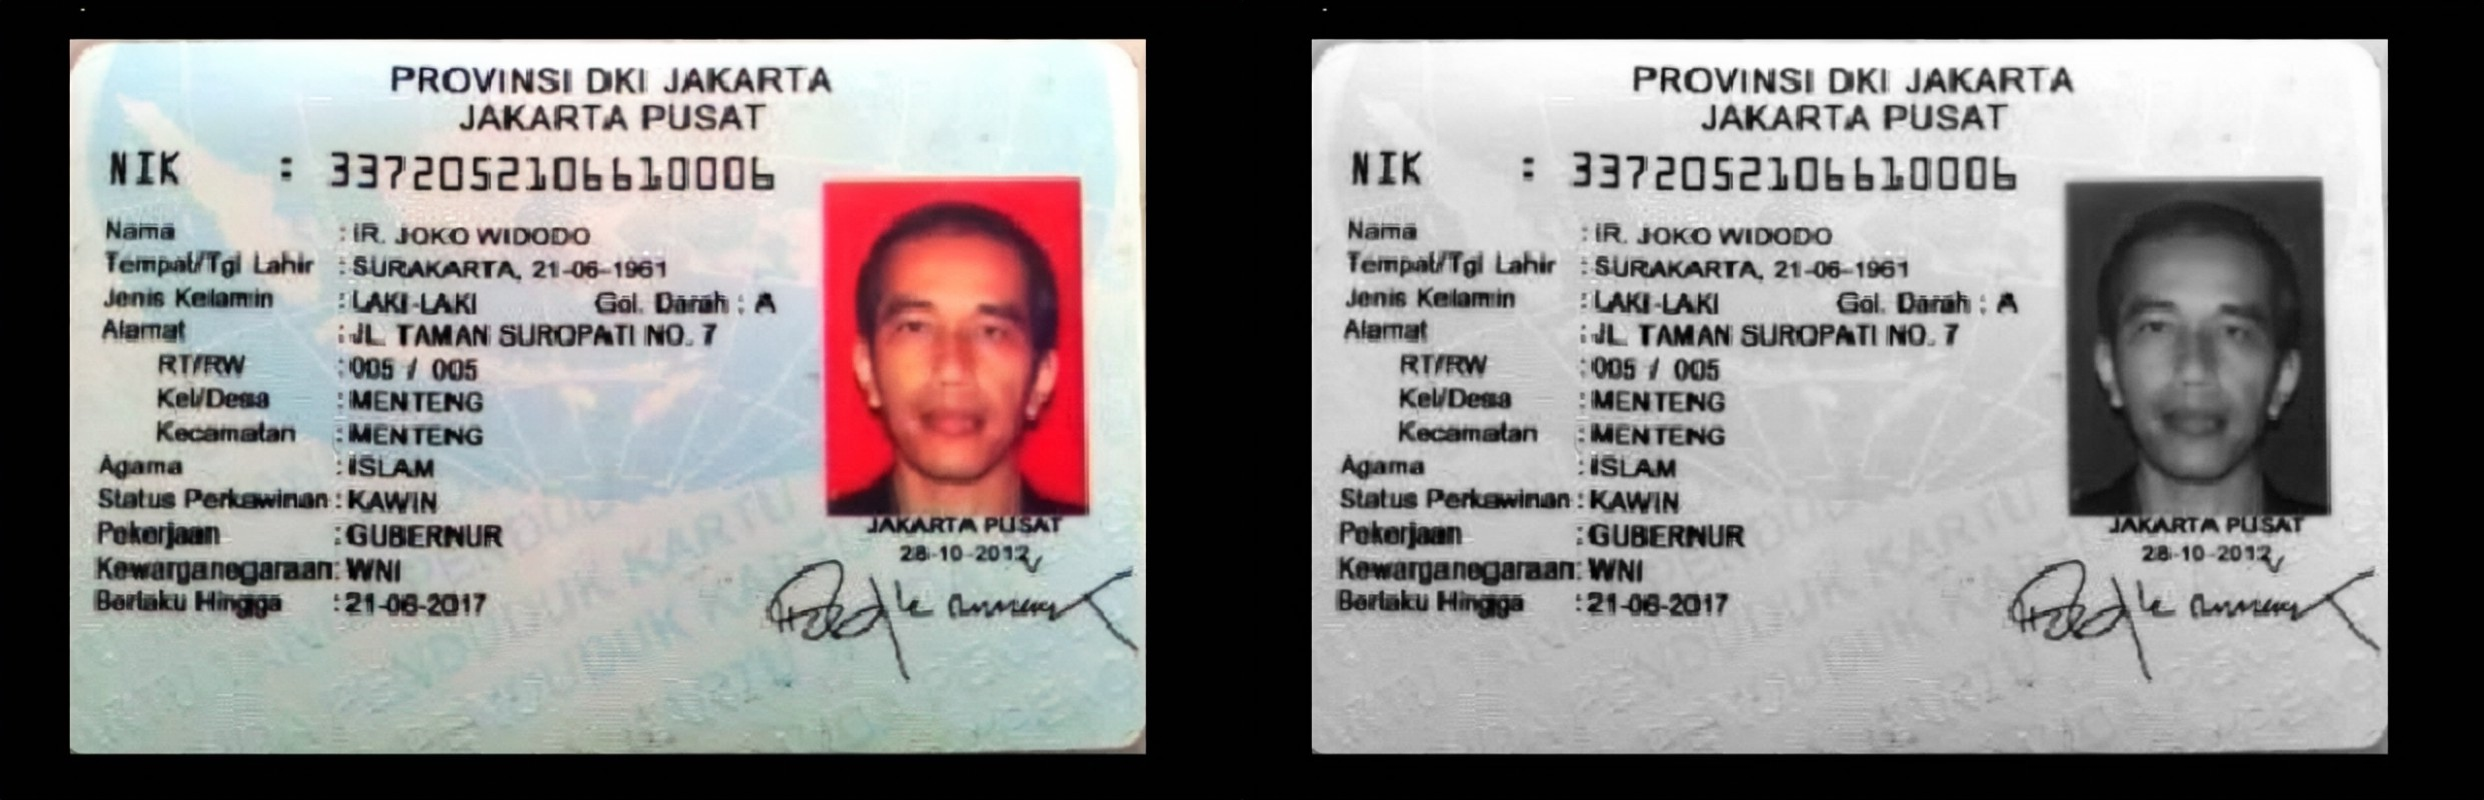

In [26]:
luminance = ktp.copy()
for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    luminance[y,x] = int((0.21*ktp[y, x][0])+(0.72*ktp[y, x][1])+(0.07*ktp[y, x][2])) # formula grayscale(luminance)=0.21R+0.72G+0.07B

final_frame = cv.hconcat((ktp, luminance))
cv2_imshow(final_frame)

### Grayscale

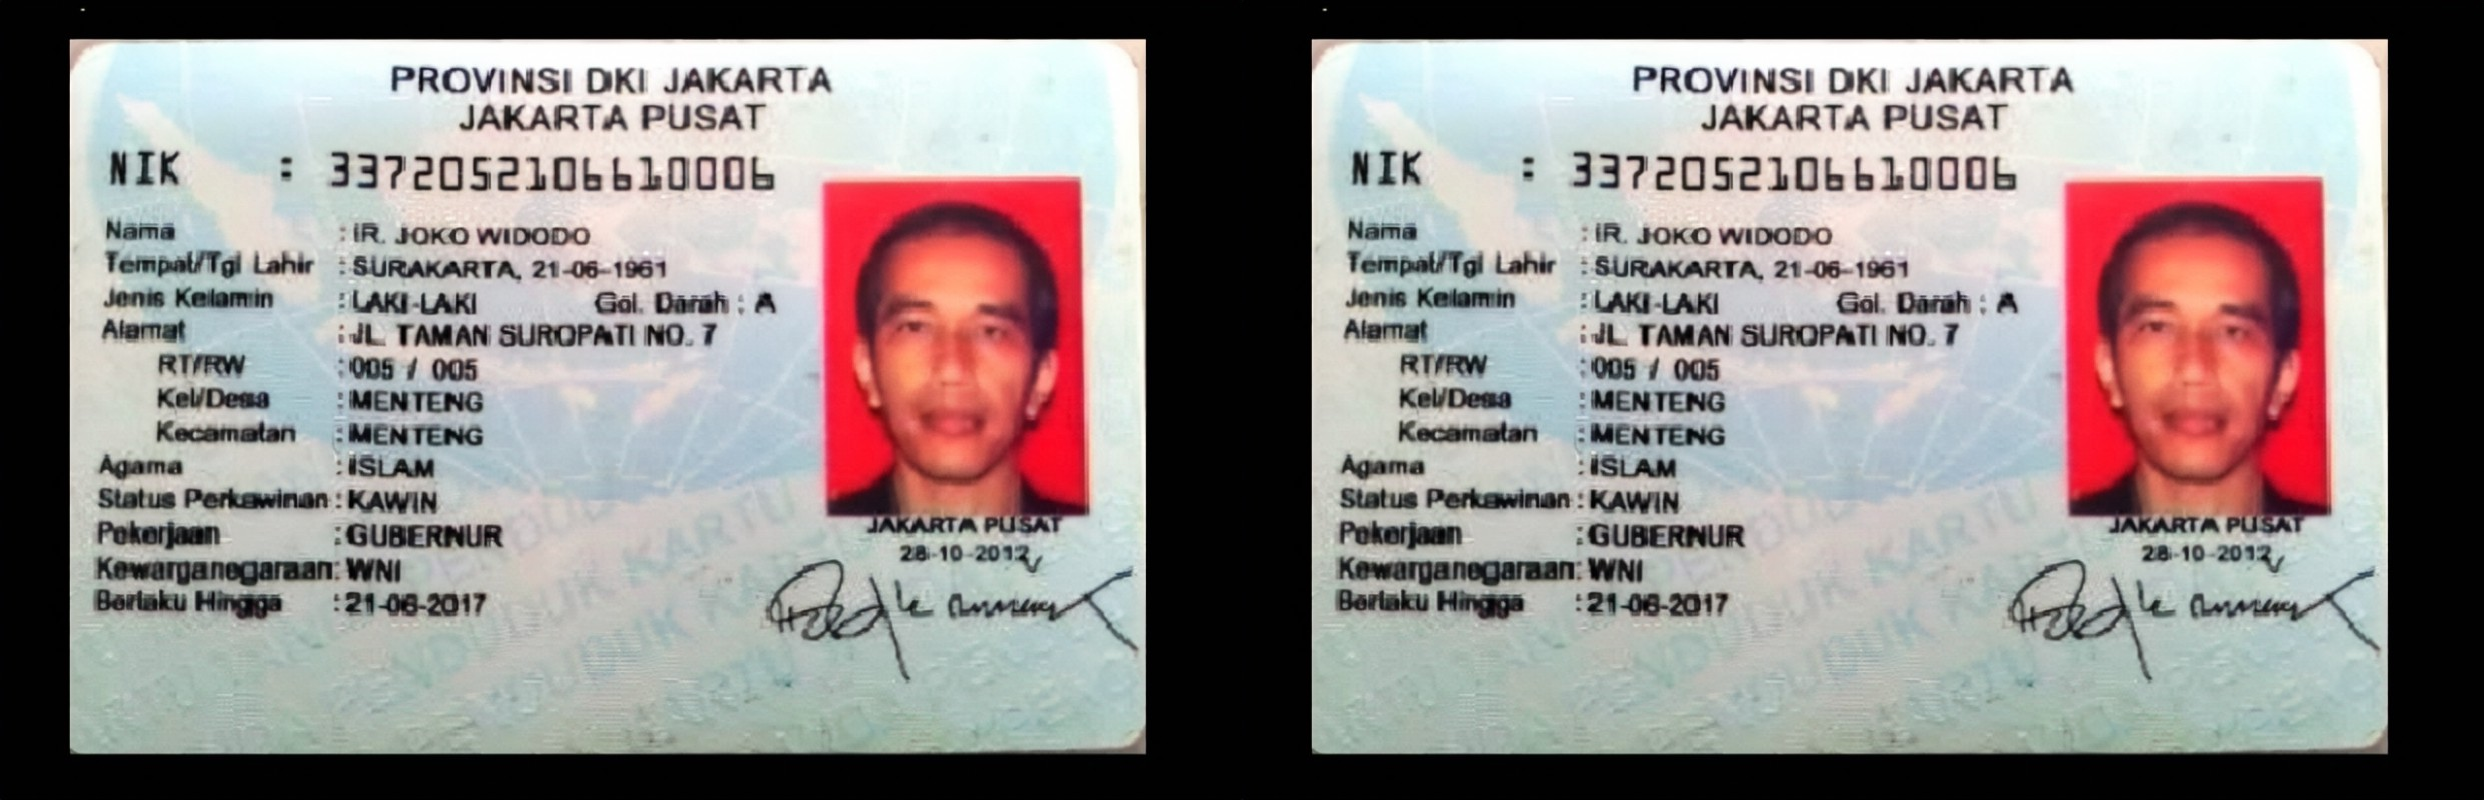

In [27]:
grayscale = ktp.copy()


final_frame = cv.hconcat((ktp, grayscale))
cv2_imshow(final_frame)